# Generating Networks and Quick Visualization

OpenPNM includes a variety of network generators. This notebook covers the use of a few commons ones which is a good primer for the rest of this tutorial series.  It also illustrates how to quickly visualize networks for inspection while developing and troubleshooting. Full visualization is best done in a dedicated software like paraview or Dragonfly.

In [1]:
import openpnm as op
import numpy as np
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()

## Cubic

The standard cubic network is the basic starting point for pore network modeling.  They are simple but still quite useful since all the key behaviors seen in a porous material are present in cubic network, such as shielding, percolation, and so on.

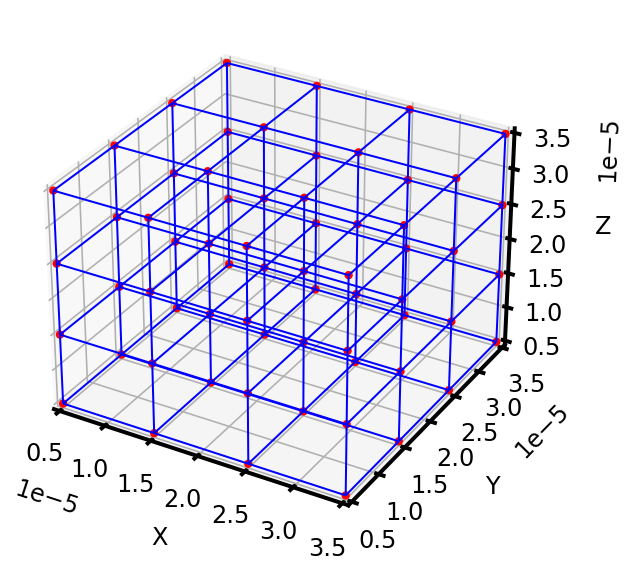

In [2]:
pn = op.network.Cubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

```{tip} 
  **Quick Visualization in the IDE:** The above block uses `op.visualization.plot_coordinates` and `op.visualization.plot_connections` which are designed for rough display of small networks. The options for visualization are explored later in this tutorial.
```

The shape and spacing of the network can both be altered:

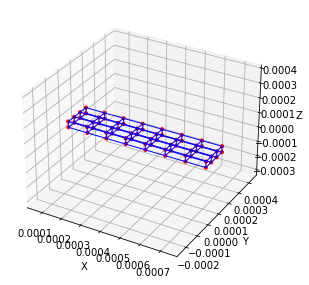

In [3]:
pn = op.network.Cubic(shape=[8, 4, 2], spacing=[10e-5, 5e-5, 4e-5])
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

It is also possible to add more than just the standard 6 connections:

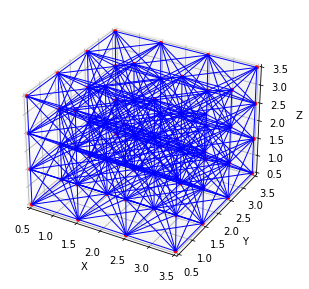

In [4]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

One of the uses of a 26-connreadd network is the removal of throats at random to create a more natural topology.  There is a more detailed description of how to manipulate networks in a following tutorial, but here we'll introduce the ``topotools`` module, which contains the ``trim`` function which allows us to delete some throats or pores:

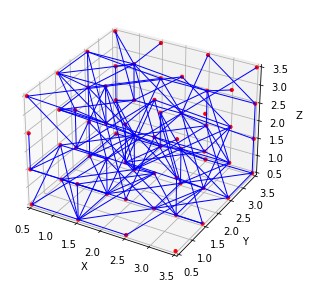

In [5]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
np.random.seed(0)
drop = np.random.randint(0, pn.Nt, 500)
op.topotools.trim(network=pn, throats=drop)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

```{tip} 
  **Printing objects to see their details:** It is common practice to print the objects at the interactive prompt to see its details using `print(pn)` for example. The displayed output shows all the arrays currently on the object, along with a few key details.  
```

In [6]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x168fbc70d10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.coords                                                       64 / 64
  2  throat.conns                                                    161 / 161
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.back                                                              16
  2  pore.bottom                                                            16
  3  pore.front                                                             16
  4 

The above printout reveals for instance that `pn` has only two "properties": 'pore.coords' and 'throat.conns'.  These are discussed further below. Also shown are several "labels" that were added to the network during generation.  These are just `boolean` arrays with `True` values indicating where the label is found, and `False` elsewhere.  This convention is discussed at length in the next tutorial. It is worth illustrating here how these can be used. Each OpenPNM object has a `pores` and a `throats` method, which returns the pore or throat indices where a given label or set of labels is present:

In [1]:
Ps = pn.pores('back')
print("The following pores are labelled 'back':", Ps)
Ps = pn.pores(['back', 'left'])
print("The following pores are labelled 'back' OR 'left':", Ps)

NameError: name 'pn' is not defined

In [8]:
Ts = pn.throats('surface')
print("The following throats are labelled 'surface':", Ts)

The following throats are labelled 'surface': [  0   1   2   3   4   5   6  11  12  14  15  16  17  18  19  20  21  22
  23  24  27  28  29  30  32  33  34  35  36  37  38  41  42  43  44  45
  48  49  52  53  56  58  59  61  64  67  68  69  71  73  76  77  80  83
  85  86  89  90  91  93  97  99 100 105 109 110 111 112 113 115 119 120
 121 122 124 126 130 131 133 134 135 136 139 140 141 143 144 146 147 148
 149 150 151 153 154 160]


## CubicTemplates
It's possible to make a cubic network with an arbitrary shape, like a sphere or cylinder, or even more complex, though it will still have a cubic lattice topology. This might be useful for simulating transport in a catalyst pellet for instance.  This requires creating a boolean image with `True` values indicating the shape of the network.  OpenPNM has a few helper functions, but you are free to create any shape. 

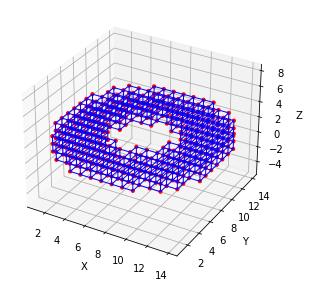

In [9]:
im = op.topotools.template_cylinder_annulus(z=3, r_outer=8, r_inner=3)
pn = op.network.CubicTemplate(template=im)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

## Other Cubic Lattices

Another useful and related set of networks are `FaceCenteredCubic` and `BodyCenteredCubic` lattices. These are very helpful for creating higher porosity networks since it jams extra pores into the interstitial spaces:

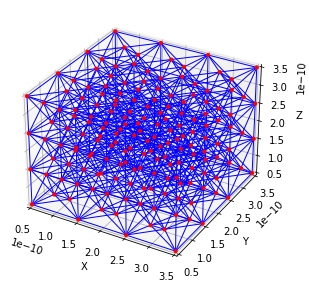

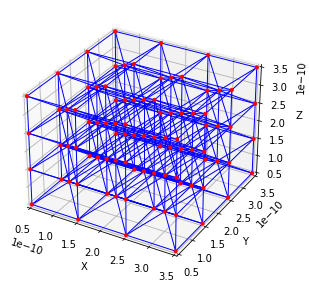

In [10]:
fcc = op.network.FaceCenteredCubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.visualization.plot_connections(fcc)
op.visualization.plot_coordinates(fcc, ax=ax)
bcc = op.network.BodyCenteredCubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.visualization.plot_connections(bcc)
ax = op.visualization.plot_coordinates(bcc, ax=ax);

```{note} 
  **The meaning of shape in fcc and bcc lattices:** Note that the 4x4x4 spacing refers to the number of corner sites, so it's basically the same size and shape as would be obtained using ``Cubic``, but it has the extra nodes placed between the corner sites.
```

The fcc and bcc lattices include labels indicating whether pores are center, corner, or face pores, as well as labels for throats indicating which type of pores they connect.  These labels can be used in the `plot_connections` and `plot_coordinates` functions to show only a portion of the pores and throats or to color them each differently.

In [11]:
print(bcc)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.BodyCenteredCubic at 0x168fbc24720>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.coords                                                       91 / 91
  2  throat.conns                                                    414 / 414
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.back                                                              16
  2  pore.body                                                              27
  3  pore.bottom                                                       

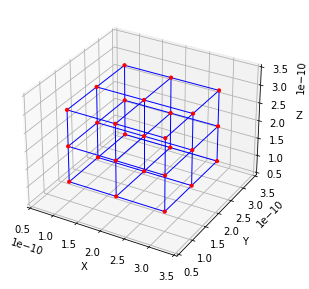

In [12]:
ax = op.visualization.plot_connections(bcc, throats=bcc.throats('body_to_body'))
ax = op.visualization.plot_coordinates(bcc, pores=bcc.pores('body'), ax=ax)

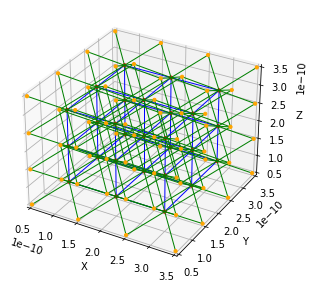

In [13]:
ax = op.visualization.plot_connections(bcc, throats=bcc.throats('body_to_body'))
ax = op.visualization.plot_coordinates(bcc, pores=bcc.pores('body'), ax=ax)
ax = op.visualization.plot_connections(bcc, throats=bcc.throats('corner_to_body'), c='g', ax=ax)
ax = op.visualization.plot_coordinates(bcc, pores=bcc.pores('corner'), ax=ax, c='orange')

## Random Network: Delaunay and Voronoi Tessellations

OpenPNM can also handle random networks with ease since the topology is stored in a totally general way, to be discussed in a later tutorial. Below is the Voronoi tessellation of a set of random base points:

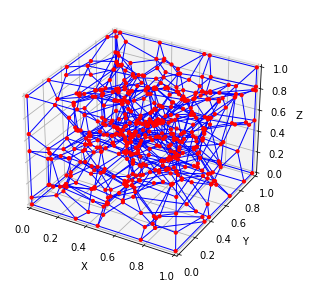

In [14]:
pn = op.network.Voronoi(shape=[1, 1, 1], points=100)
ax = op.visualization.plot_connections(pn)
ax = op.visualization.plot_coordinates(pn, ax=ax)

And there is also the complementary Delaunay tessellation:

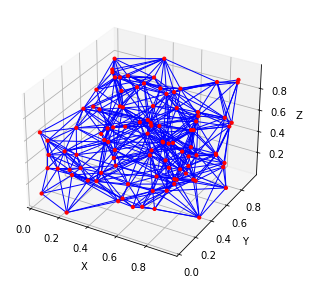

In [15]:
pn = op.network.Delaunay(shape=[1, 1, 1], points=100)
ax = op.visualization.plot_connections(pn)
ax = op.visualization.plot_coordinates(pn, ax=ax)

And these can be combined in a dual network where the Voronoi and Delaunay networks interpenetrate each other and are connected by additional throats:

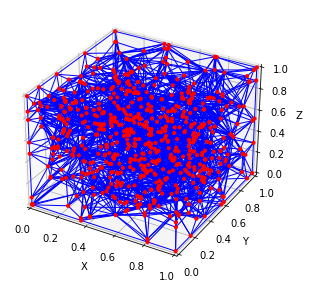

In [16]:
pn = op.network.DelaunayVoronoiDual(shape=[1, 1, 1], points=100)
ax = op.visualization.plot_connections(pn)
ax = op.visualization.plot_coordinates(pn, ax=ax);

It is also possible to create these lattices in cylindrical and spherical shapes.  This is done via the `shape` argument such that [x, y, z] assumes Cartesian, [r, z] assumes cylindrical and [r] assumes spherical:

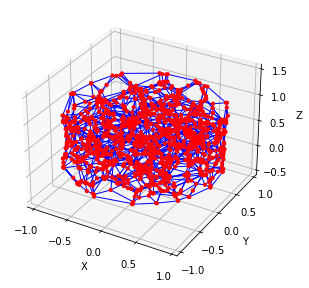

In [24]:
cyl = op.network.Voronoi(shape=[1, 1], points=200)
ax = op.visualization.plot_connections(cyl)
ax = op.visualization.plot_coordinates(cyl, ax=ax);

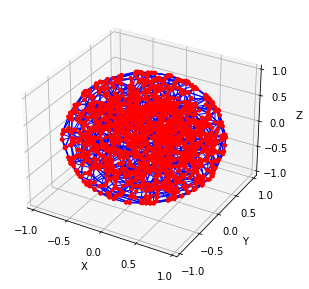

In [26]:
sph = op.network.Voronoi(shape=[1], points=400)
ax = op.visualization.plot_connections(sph)
ax = op.visualization.plot_coordinates(sph, ax=ax);

## Imported Networks

Just as OpenPNM can handle random Voronoi networks, it can handle network extracted from images as well. The basic idea is that OpenPNM needs to know the [x, y, z] coordinates of each pore, and which pores are connected to which.  Let's generate our own simple network just for fun:

In [27]:
coords = [[0, 0, 0],  # coordinates for pore 0
          [1, 0, 0],  # coordinates for pore 1
          [1, 1, 0],  # coordinates for pore 2
          [0, 1, 0]]  # coordinates for pore 3
conns = [[0, 1],  # throat 0 connects pores 0 and 1
         [1, 2],  # throat 1 connects pores 1 and 2
         [2, 3],  # throat 2 connects pores 2 and 3
         [0, 3]]  # throat 3 connects pores 0 and 3
Dpore = [1,  # diameter for pore 0
         2,  # diameter for pore 1
         1,  # diameter for pore 2
         3,]  # diameter for pore 3
Dthroat = [0.5,  # diameter for throat 0
           0.2,  # diameter for throat 1
           0.8,  # diameter for throat 2
           0.7]  # diameter for throat 3

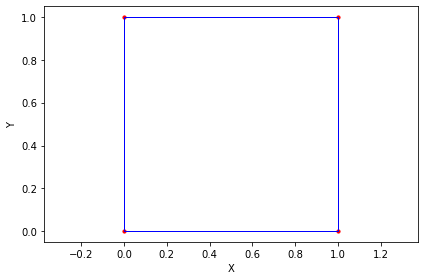

In [28]:
pn = op.network.Network(coords=coords, conns=conns)
ax = op.visualization.plot_connections(pn)
ax = op.visualization.plot_coordinates(pn, ax=ax)

Now let's add the pore and throat diameter values. Note the naming convention of preceding the keys with `'pore.'` or `'throat.'`. This will be discussed in more depth in the next tutorial.

In [29]:
pn['pore.diameter'] = Dpore
pn['throat.diameter'] = Dthroat

Now we can use the pore and throat sizes to augment our plotting a little bit: 

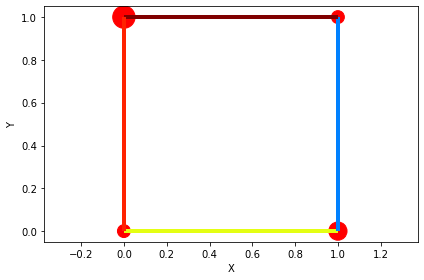

In [30]:
ax = op.visualization.plot_connections(pn, color_by=pn['throat.diameter'], linewidth=4)
ax = op.visualization.plot_coordinates(pn, size_by=pn['pore.diameter'], markersize=500, ax=ax)

For extracted networks it is not expected that a user would enter all the values by hand as done above. OpenPNM has an ``io`` module which contains functions for reading from a wide assortment of file formats, as well as outputting to a limited number. 